In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
from scipy import stats
import wquantiles
import statsmodels
import statsmodels.robust.scale
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
import sklearn
from pywaffle import Waffle
import scipy

In [16]:
#hide all the warnings in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [17]:
#import lib
import sklearn
from pylab import rcParams
rcParams['figure.figsize']=10,8

In [18]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import interp1d
#from scipy.interpolate import Spline
from scipy.interpolate import splrep
from sklearn.neighbors import NearestNeighbors
from sklearn.kernel_ridge import KernelRidge

In [19]:
#load data
#read the house price dataset using pandas.read_csv function into an object
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
#checking data size
data.shape

(1460, 81)

In [22]:
#d# Data frame with categorical features
data.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [23]:
#data frame with numerical features
data.describe(include=['int64'])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [24]:
# splitting the target variable
#here the target variable is seperated from data and the distribution is checked
target = data.SalePrice
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

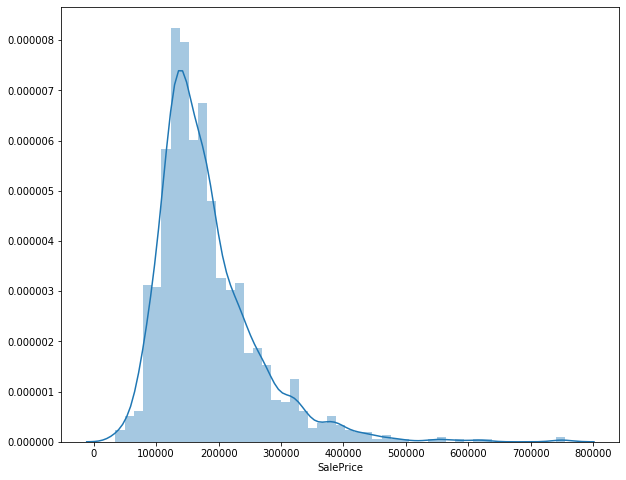

In [25]:
#visualizing the distribution of salesprice(dependent) variable
import seaborn as sns
sns.distplot(target,hist=True)

In [26]:
#Log transformation
import numpy as np
target_log = np.log(target)

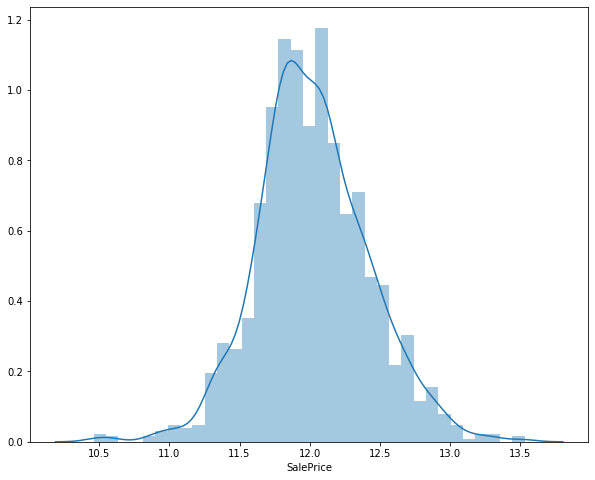

In [27]:
sns.distplot(target_log,hist=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A134CB508>,
      dtype=object)

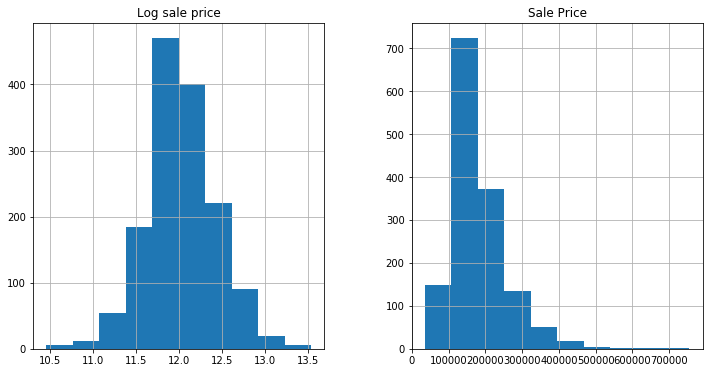

In [28]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
prices=pd.DataFrame({'Sale Price':data['SalePrice'],'Log sale price': target_log})
prices.hist()

In [29]:
raw_data = data

In [30]:
#drop the target variable from dataset

data = data.drop(['SalePrice'],axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# Feature Engineering

In [31]:
#MSSubclass = the building class
data['MSSubClass'] = data['MSSubClass'].apply(str)

#changing OverallCond into categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [32]:
#Adding total sqfootage feature
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

#removing TotalBsmtSF,1stFlrSF,2ndFlrSF and ID
data = data.drop(['TotalBsmtSF'],axis = 1)
data = data.drop(['1stFlrSF'],axis = 1)
data = data.drop(['2ndFlrSF'],axis = 1)
data = data.drop(['Id'],axis = 1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2566
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2524
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2706
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2473
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,3343


In [33]:
#save all categorical columns in list
categorical_columns = [col for col in data.columns.values if data[col].dtype == 'object' ]

#dataframe with categorical features
data_cat = data[categorical_columns]
#dataframe with numerical features
data_num = data.drop(categorical_columns,axis=1)

In [34]:
#using describe function in numeric dataframe
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2567.048630
std,24.284752,9981.264932,1.382997,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,821.714421
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000
25%,59.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.500000
50%,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2474.000000
75%,80.000000,11601.500000,7.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3004.000000
max,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,11752.000000


In [35]:
#printing 5 head obesrvation in categorical dataframe
data_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


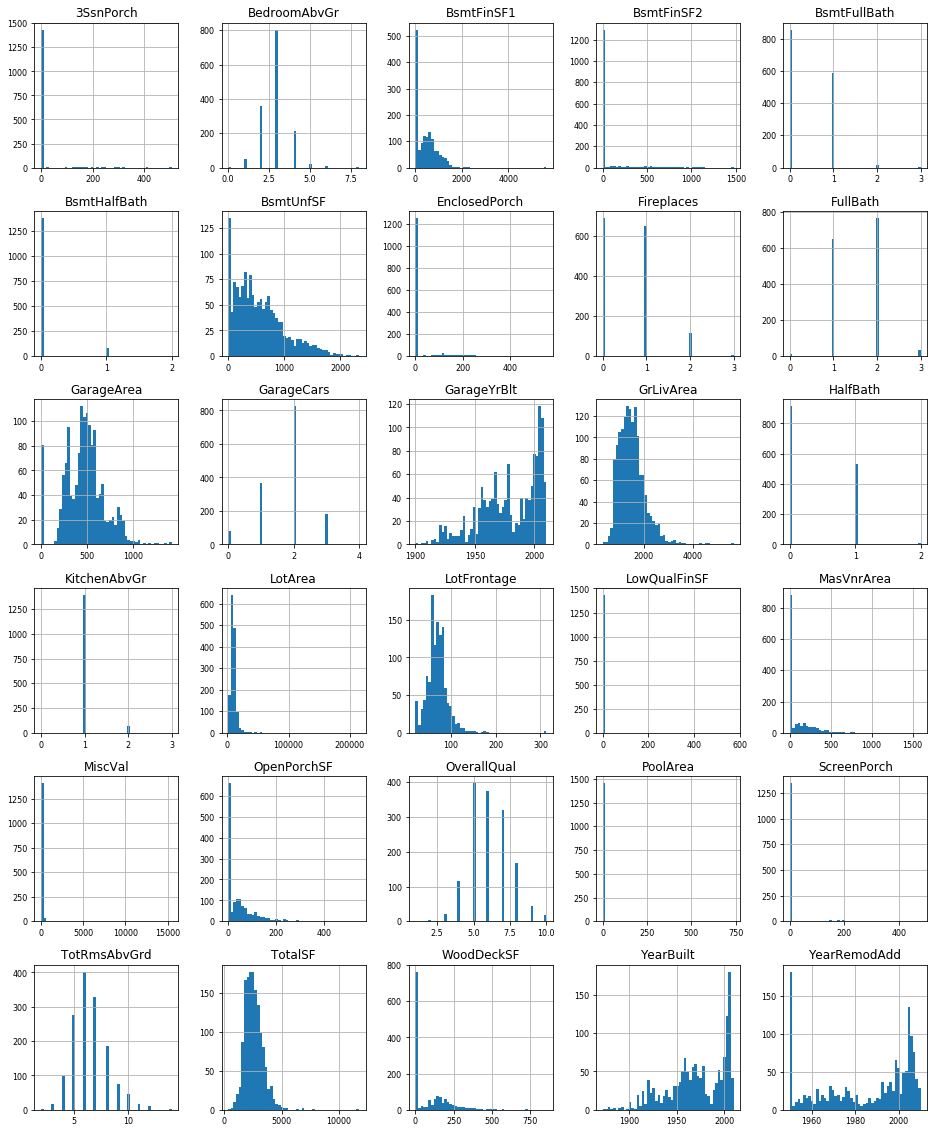

In [36]:
data_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8); #; avoid having verbose informations

In [37]:
from scipy.stats import skew
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
data_num_skew = data_num_skew[data_num_skew > .75]

#apply log+1 transformation for all numeric features with skewness over .75
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

In [38]:
data_num_skew

LotFrontage       2.160866
LotArea          12.195142
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
TotalSF           1.774874
dtype: float64

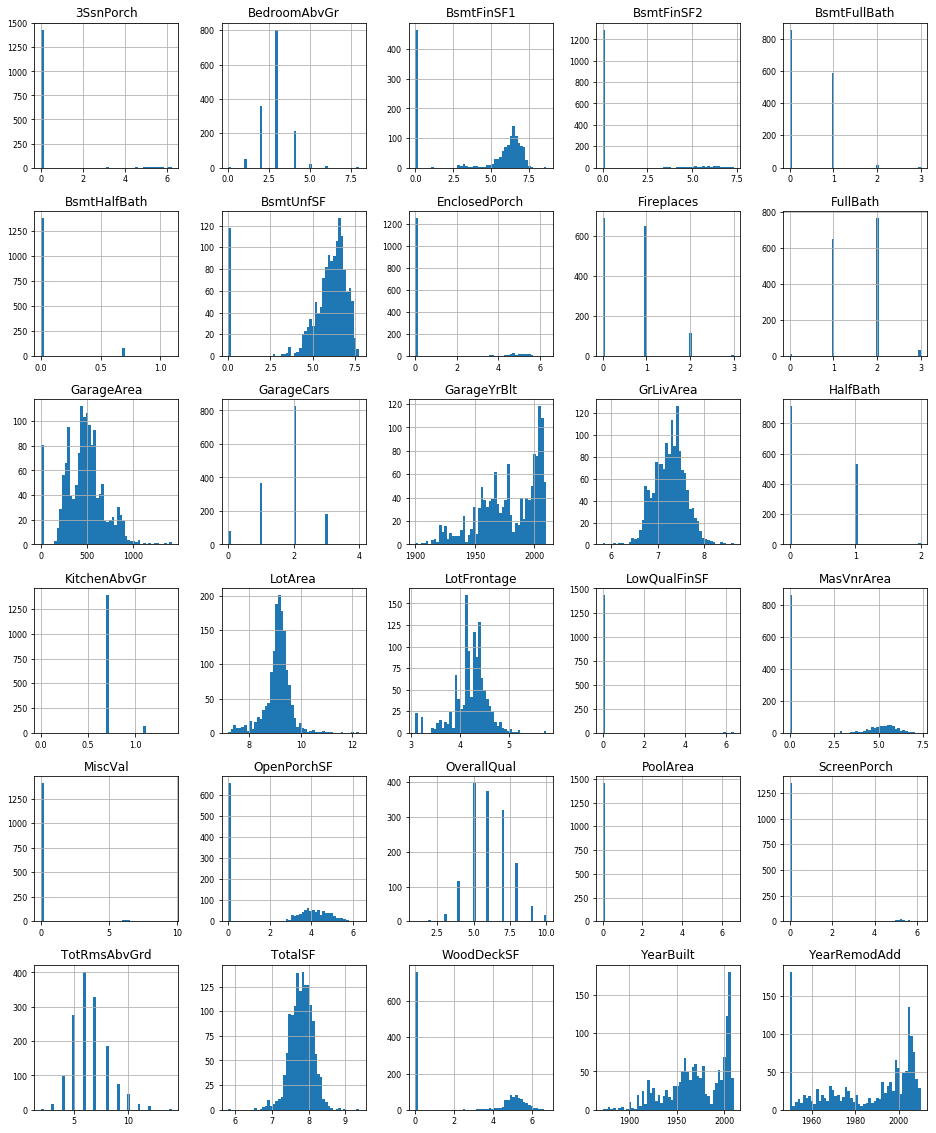

In [39]:
data_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8);

# Mean normalization

In [40]:
data_num = (data_num - data_num.mean())/(data_num.max() - data_num.min())
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1.201000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.452000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.494947e-15,4.984835e-16,1.946692e-17,2.267735e-16,1.541119e-15,-2.879545e-16,4.277020e-16,1.277517e-17,5.977049e-16,-2.756072e-17,...,7.551037e-17,-6.957905e-18,4.643166e-16,-4.462564e-16,6.616663e-17,-1.454791e-17,1.127333e-17,-7.648467e-17,2.399622e-17,-1.981462e-15
std,1.302418e-01,1.012732e-01,1.536663e-01,2.188616e-01,3.440901e-01,3.566180e-01,3.463615e-01,2.528701e-01,2.390241e-01,1.176771e-01,...,1.868288e-01,1.507792e-01,3.843948e-01,3.413088e-01,2.735105e-01,1.070007e-01,2.272059e-01,6.641407e-02,1.270673e-01,8.809425e-02
min,-4.198342e-01,-3.797634e-01,-5.665906e-01,-7.193319e-01,-5.810959e-01,-2.889448e-01,-4.896358e-01,-8.982469e-02,-7.282006e-01,-1.571654e-02,...,-4.417808e-01,-3.335544e-01,-3.637825e-01,-3.660704e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,-5.589950e-01
25%,-4.241893e-02,-3.544346e-02,-1.221461e-01,-1.251290e-01,-2.977626e-01,-2.889448e-01,-4.896358e-01,-8.982469e-02,-3.051994e-02,-1.571654e-02,...,-1.917808e-01,-9.765877e-02,-3.637825e-01,-3.660704e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,-5.530119e-02
50%,1.556841e-02,8.988780e-03,-1.103501e-02,1.255211e-02,1.522374e-01,-2.889448e-01,1.993641e-01,-8.982469e-02,6.733259e-02,-1.571654e-02,...,5.821918e-02,4.950538e-03,-3.637825e-01,1.505731e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,3.122795e-03
75%,7.047235e-02,4.854699e-02,1.000761e-01,2.082043e-01,3.189041e-01,4.047022e-01,2.708912e-01,-8.982469e-02,1.350357e-01,-1.571654e-02,...,5.821918e-02,7.265153e-02,3.956845e-01,3.053412e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,5.766237e-02
max,5.801658e-01,6.202366e-01,4.334094e-01,2.806681e-01,4.189041e-01,7.110552e-01,5.103642e-01,9.101753e-01,2.717994e-01,9.842835e-01,...,5.582192e-01,6.664456e-01,6.362175e-01,6.339296e-01,8.894728e-01,9.862528e-01,9.335038e-01,9.953929e-01,9.758043e-01,4.410050e-01


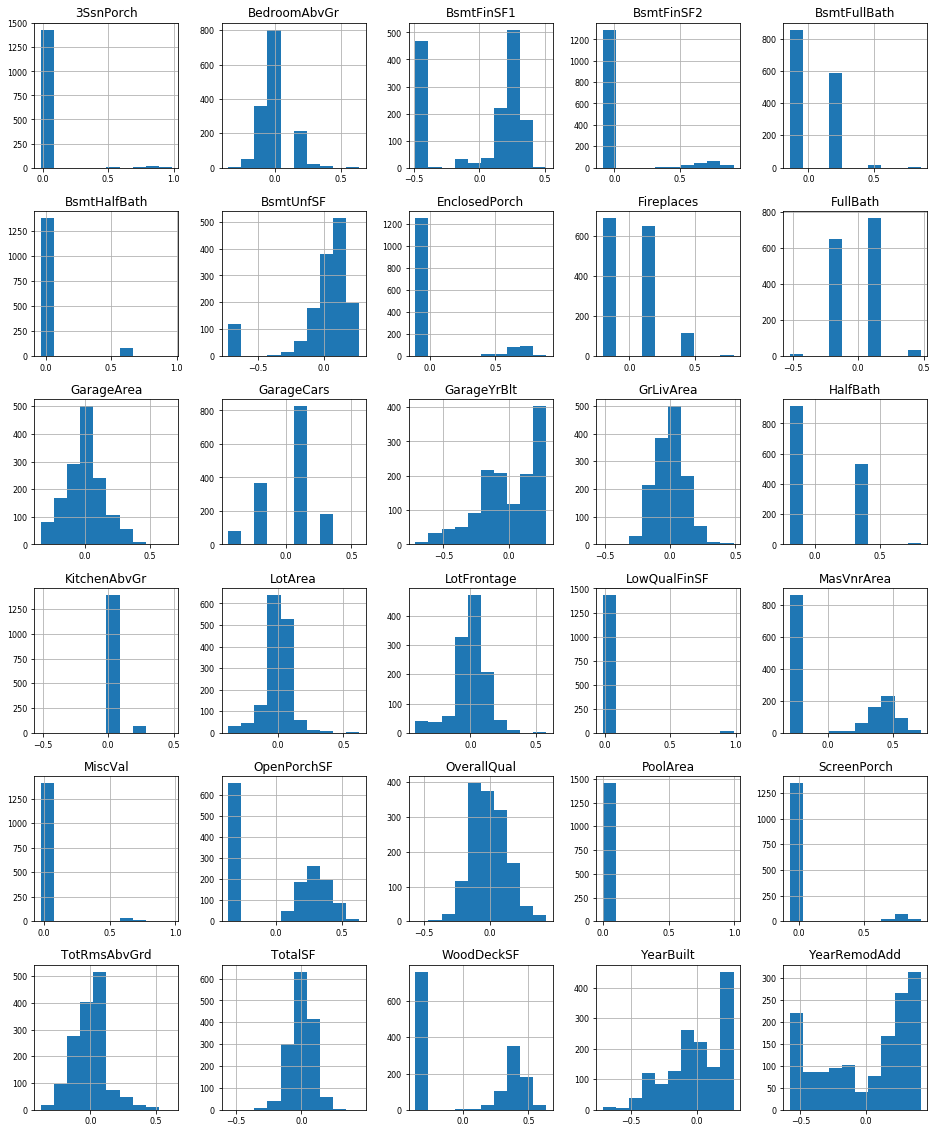

In [41]:
data_num.hist(figsize=(16,20),xlabelsize=8,ylabelsize=8);

# 4.Missing data analysis

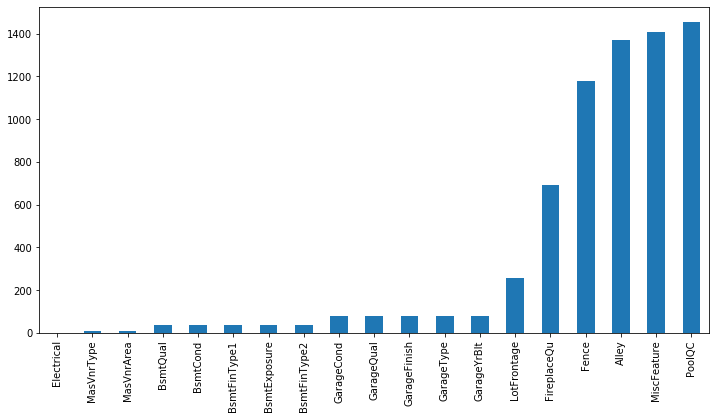

In [42]:
# first we will visualize null count in overall dataframe

null_in_HousePrice = data.isnull().sum()
null_in_HousePrice = null_in_HousePrice[null_in_HousePrice > 0]
null_in_HousePrice.sort_values(inplace=True)
null_in_HousePrice.plot.bar()

In [43]:
#printing total numbers and percentage of missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(15)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


# 5.1 Handling missing values in Numerical columns

In [44]:
data_len =data_num.shape[0]

#check what is the percentage of missing values in categorical dataframe
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    #print("{} - missing values : {} ({0.2f}%)".format(col,missing_values,missing_values/data_len*100))
    
    #drop column if there is more than 50 missing values
    if missing_values > 260:
        #print('dropping column: {}'.format(col))
        data_num = data_num.drop(col, axis=1)
    #if there is less than 260 missing values then fill with median of column
    else:
        #print('filling missing vaues with the median in column: {}'.format(col))
        data_num = data_num.fillna(data_num[col].median())

# 5.2 Handling missing values in categorical columns

In [45]:
data_len =data_cat.shape[0]

#check what is the percentage of missing values in categorical dataframe
for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    #print("{} - missing values : {} ({0.2f}%)".format(col,missing_values,missing_values/data_len*100))
    
    #drop column if there is more than 50 missing values
    if missing_values > 50:
        #print('dropping column: {}'.format(col))
        data_cat.drop(col, axis=1)
    #if there is less than 50 missing values then fill with median of column
    else:
        #print('filling missing vaues with the median in column: {}'.format(col))
        #data_cat = data_cat.fillna('XXX')
        pass

In [46]:
data_cat.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,...,1379,1379,1460,7,281,54,1460,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,...,5,5,3,3,4,4,12,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,Gd,MnPrv,Shed,6,2009,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,...,1311,1326,1340,3,157,49,253,338,1267,1198


# Dummy coding for categorical variables

In [47]:
data_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [48]:
#using pandas.get_dummies funtion to convert categorical variable into dummy variables
data_cat_dummies = pd.get_dummies(data_cat,drop_first=True)

In [49]:
#viewing dimensionality of the dataframe
data_cat_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [50]:
print('Numerical features: '+ str(len(data_num.columns)))
print('Categorical features: '+ str(len(data_cat_dummies.columns)))

Numerical features: 30
Categorical features: 246


In [51]:
#using concat funtion we merge two dataframes fro further analysis
newdata = pd.concat([data_num, data_cat_dummies], axis=1)

# Exploratory data anlysis

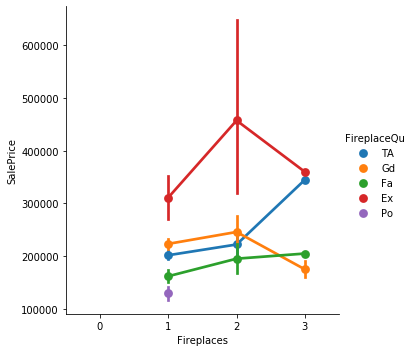

In [52]:
sns.factorplot('Fireplaces','SalePrice',data=raw_data,hue='FireplaceQu');

In [53]:
#if fireplace is missing it means that house is missing fireplace
FireplaceQu = data['FireplaceQu'].fillna('None')
pd.crosstab(data.Fireplaces,raw_data.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


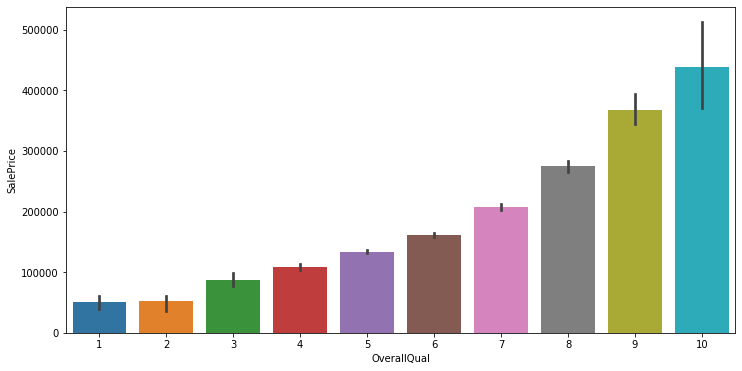

In [54]:
sns.barplot(data.OverallQual,raw_data.SalePrice)

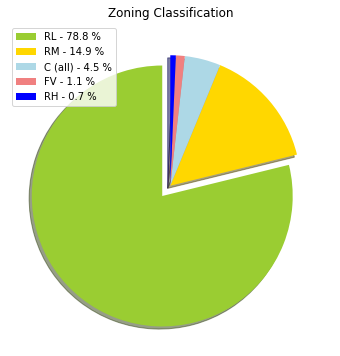

Text(0, 0.5, 'Sale Price')

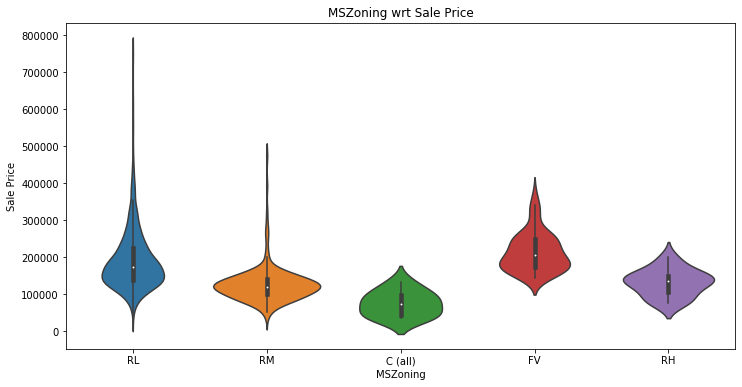

In [55]:
#MSZoning
labels = raw_data["MSZoning"].unique()
sizes = raw_data["MSZoning"].value_counts().values
explode = [0.1, 0, 0, 0, 0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral', 'blue']
patches, texts = plt.pie(sizes, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.legend(patches, labels, loc = "best")

plt.title("Zoning Classification")
plt.show()

sns.violinplot(raw_data.MSZoning, raw_data["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price")

Text(0.5, 0, 'Price per square feet')

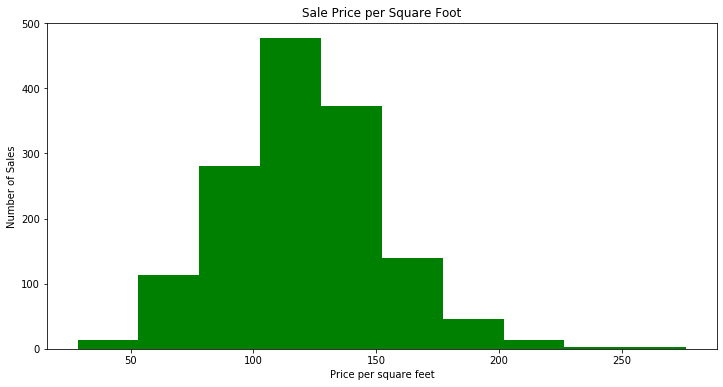

In [56]:
#saleprice per square foot
SalePriceSF=raw_data['SalePrice']/raw_data['GrLivArea']
plt.hist(SalePriceSF,color="green")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet')

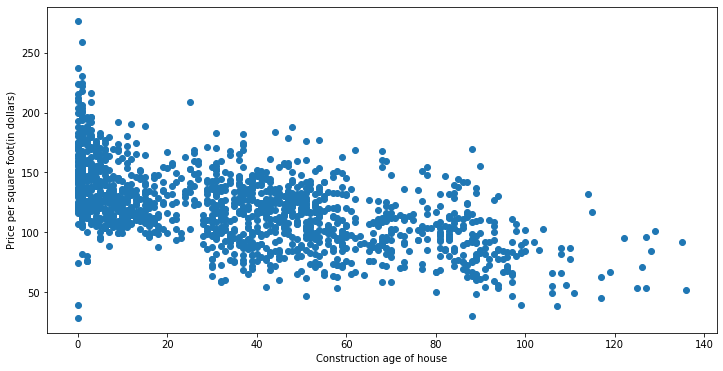

In [57]:
ConstructionAge = raw_data['YrSold'] - raw_data['YearBuilt']
plt.scatter(ConstructionAge, SalePriceSF)
plt.ylabel('Price per square foot(in dollars)')
plt.xlabel('Construction age of house');

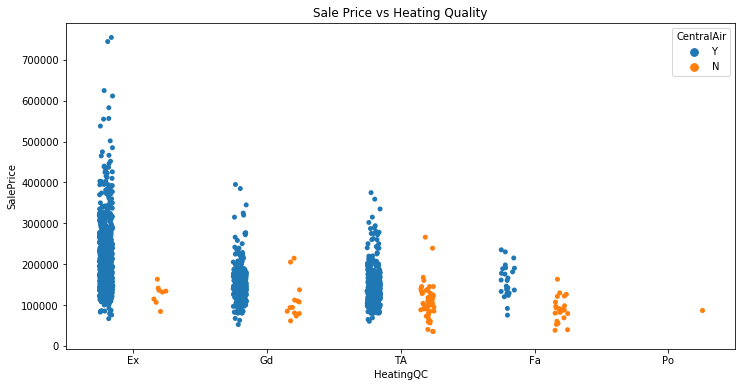

In [58]:
# Heating and AC arrangements
#Heating and AC arrangements
sns.stripplot(x = "HeatingQC", y = "SalePrice", data = raw_data, hue = 'CentralAir', jitter = True, split = True)
plt.title("Sale Price vs Heating Quality");

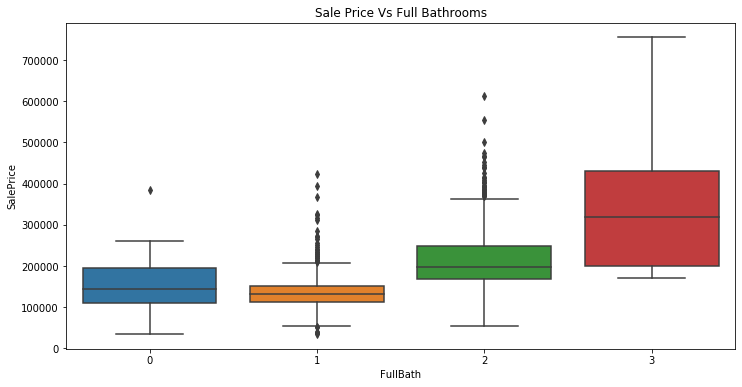

In [59]:
sns.boxplot(raw_data["FullBath"],raw_data["SalePrice"])
plt.title("Sale Price Vs Full Bathrooms");

Text(0.5, 1, 'Sale Price vs Kitchen')

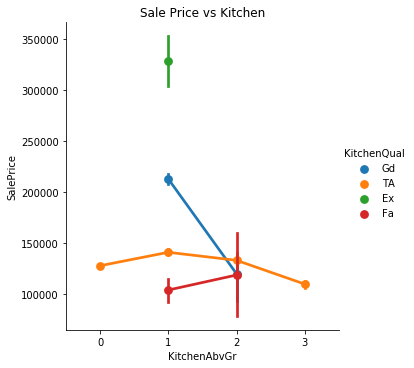

In [60]:
# kitchen Quality
sns.factorplot("KitchenAbvGr","SalePrice",data=raw_data,hue="KitchenQual")
plt.title("Sale Price vs Kitchen")

In [72]:
# check correlation
data_num.corr()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
LotFrontage,1.000000,0.652386,0.205269,0.087589,0.059305,0.117652,0.067373,0.035608,0.102782,-0.006357,...,0.273091,0.317798,0.059865,0.133624,-0.021137,0.056284,0.044893,0.119599,0.028491,0.372916
LotArea,0.652386,1.000000,0.178220,0.021943,0.027672,0.070651,0.096966,0.084312,0.047510,-0.010681,...,0.272010,0.322048,0.122915,0.137754,-0.015186,0.055375,0.087518,0.097257,0.080298,0.427126
OverallQual,0.205269,0.178220,1.000000,0.572323,0.550684,0.413958,0.054199,-0.101469,0.268446,-0.029924,...,0.600671,0.562022,0.283256,0.445101,-0.158648,0.027546,0.049983,0.072651,-0.085131,0.678565
YearBuilt,0.087589,0.021943,0.572323,1.000000,0.592855,0.412631,0.151209,-0.068793,0.090576,-0.182266,...,0.537850,0.478954,0.307474,0.389065,-0.446694,0.028977,-0.059629,0.005805,-0.077819,0.366477
YearRemodAdd,0.059305,0.027672,0.550684,0.592855,1.000000,0.224771,0.012105,-0.102425,0.167086,-0.057486,...,0.420622,0.371600,0.285773,0.382743,-0.226996,0.052398,-0.039983,0.009025,-0.074574,0.362181
MasVnrArea,0.117652,0.070651,0.413958,0.412631,0.224771,1.000000,0.187145,-0.063123,0.093741,-0.108616,...,0.390094,0.371069,0.161452,0.209989,-0.186108,0.047022,0.037353,0.005346,-0.054501,0.382169
BsmtFinSF1,0.067373,0.096966,0.054199,0.151209,0.012105,0.187145,1.000000,0.185051,-0.265488,-0.063563,...,0.070302,0.117933,0.082144,0.015075,-0.127733,0.051775,0.073392,0.042147,0.018808,0.167094
BsmtFinSF2,0.035608,0.084312,-0.101469,-0.068793,-0.102425,-0.063123,0.185051,1.000000,-0.272666,0.006314,...,-0.053164,-0.018257,0.059134,-0.077644,0.038587,-0.022537,0.063879,0.068055,0.027978,0.019398
BsmtUnfSF,0.102782,0.047510,0.268446,0.090576,0.167086,0.093741,-0.265488,-0.272666,1.000000,0.001886,...,0.146919,0.113877,0.014448,0.182827,0.001014,0.004390,0.012820,-0.026761,-0.030640,0.377397
LowQualFinSF,-0.006357,-0.010681,-0.029924,-0.182266,-0.057486,-0.108616,-0.063563,0.006314,0.001886,1.000000,...,-0.094253,-0.071387,-0.037934,-0.000397,0.047332,0.016699,-0.014132,0.068662,0.025156,-0.022774


Text(0.5, 1, 'Correlation between features')

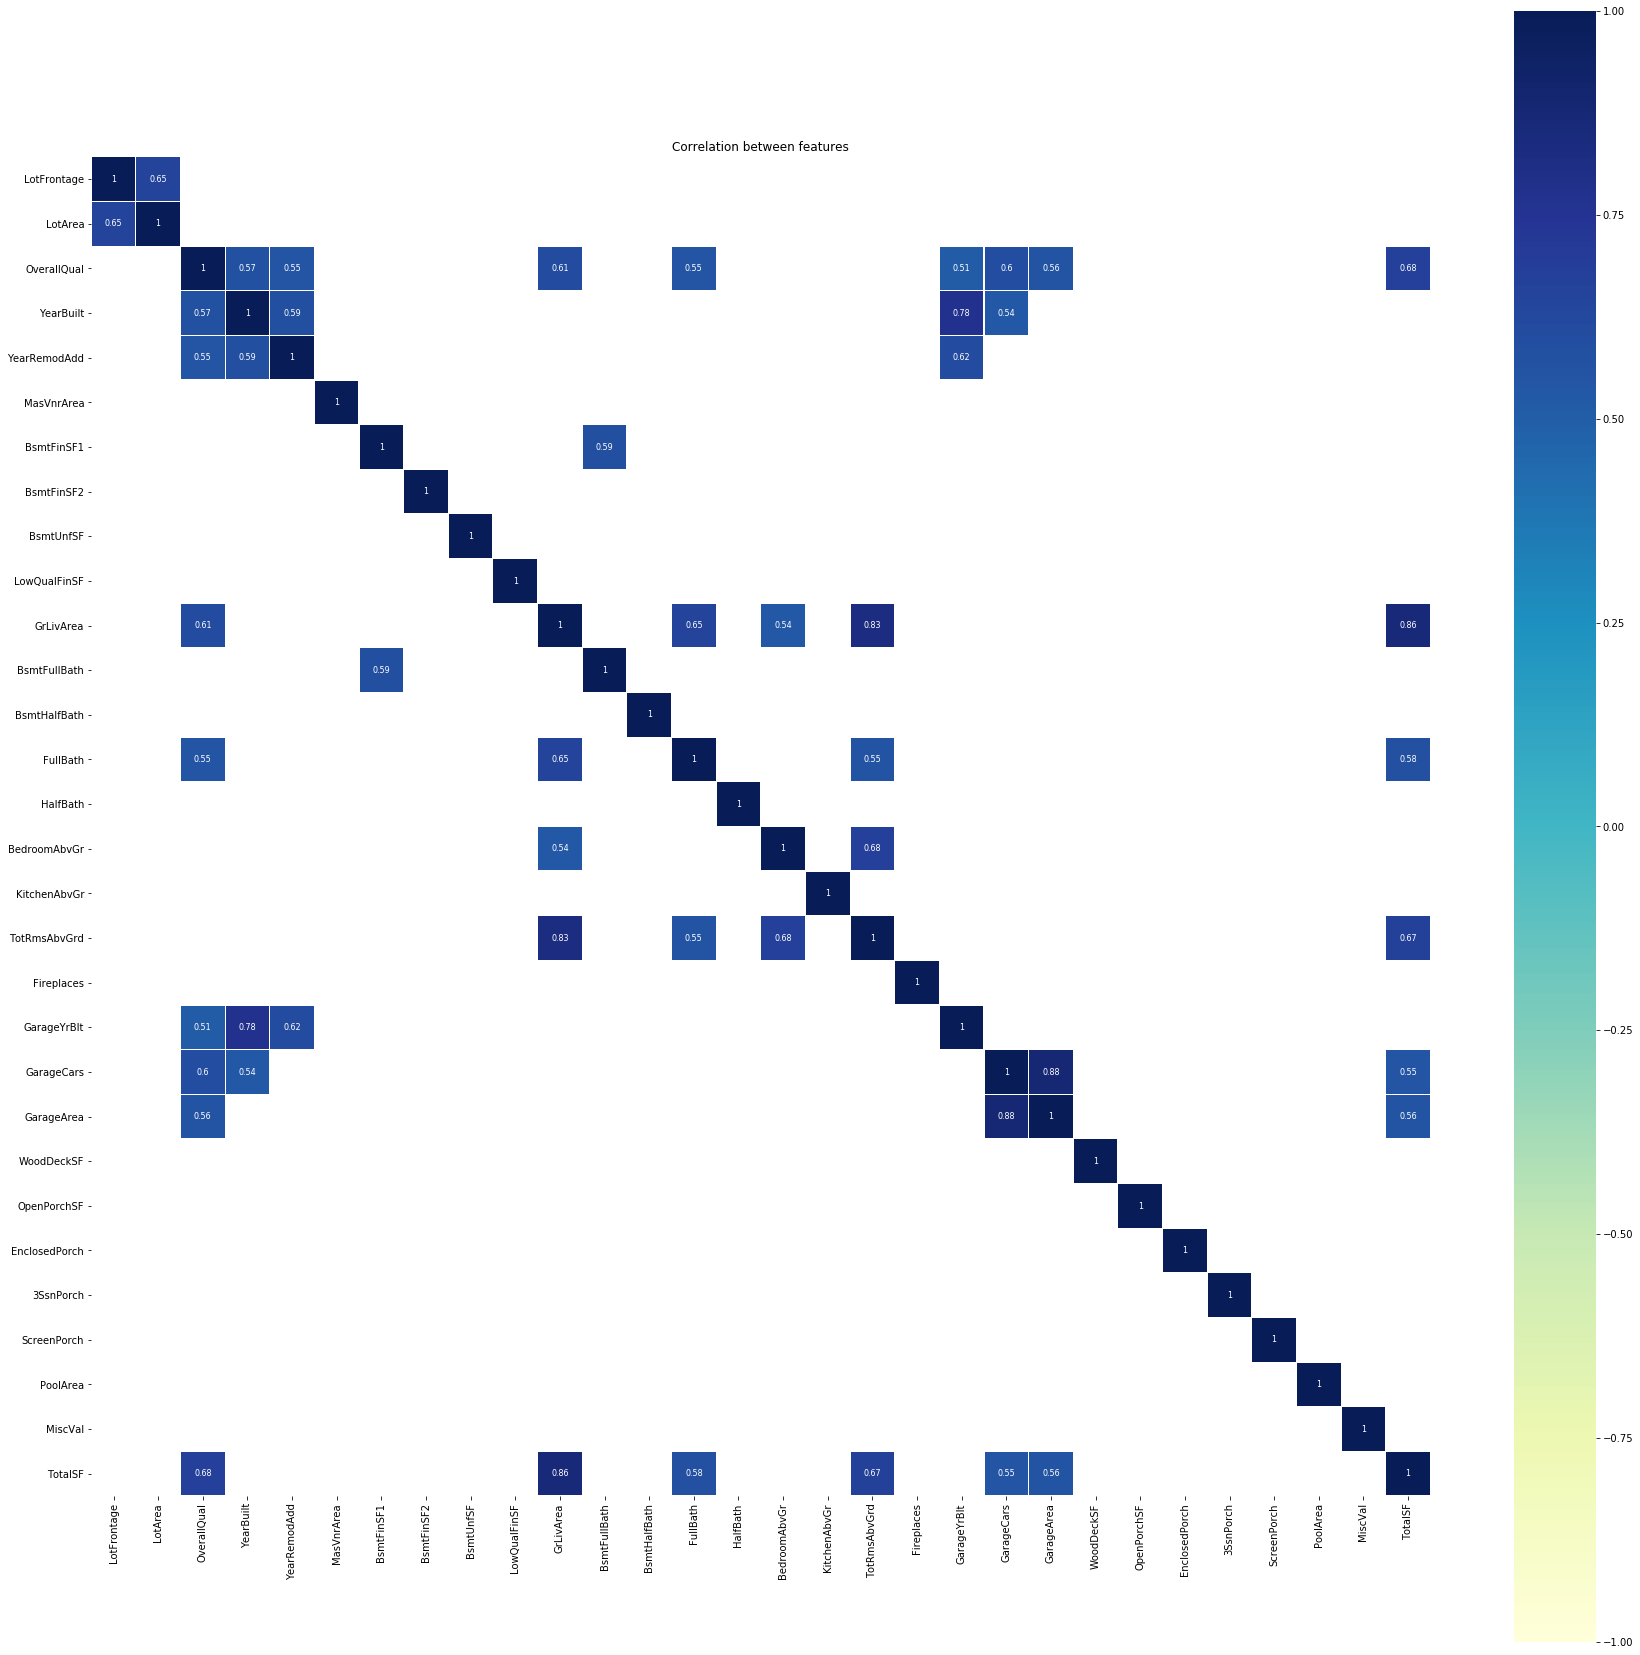

In [73]:
#plotting correlation plot
import matplotlib.pyplot as plt
corr=data_num.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr[(corr>=0.5)|(corr<=-0.5)],cmap='YlGnBu',vmax=1.0,vmin=-1.0,linewidth=0.1,annot=True,annot_kws={"size":8},square=True);
plt.title("Correlation between features")

In [74]:
newdata

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.006566,-0.013492,0.100076,0.229943,0.302237,0.427093,0.269872,-0.089825,-0.081362,-0.015717,...,0,0,0,0,1,0,0,0,1,0
1,0.070472,0.011482,-0.011035,0.034291,-0.147763,-0.288945,0.307553,-0.089825,0.000530,-0.015717,...,0,0,0,0,1,0,0,0,1,0
2,0.010156,0.042525,0.100076,0.215451,0.285571,0.401416,0.226721,-0.089825,0.055046,-0.015717,...,0,0,0,0,1,0,0,0,1,0
3,-0.036201,0.010460,0.100076,-0.407738,-0.247763,-0.288945,0.133144,-0.089825,0.083160,-0.015717,...,0,0,0,0,1,0,0,0,0,0
4,0.088605,0.088931,0.211187,0.208204,0.252237,0.505374,0.261205,-0.089825,0.070658,-0.015717,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.024065,-0.026244,-0.011035,0.200958,0.252237,-0.288945,-0.489636,-0.089825,0.156290,-0.015717,...,0,0,0,0,1,0,0,0,1,0
1456,0.093004,0.073441,-0.011035,0.048784,0.052237,0.359909,0.282869,0.609131,0.094338,-0.015717,...,0,0,0,0,1,0,0,0,1,0
1457,-0.000909,-0.000239,0.100076,-0.219332,0.352237,-0.288945,0.160985,-0.089825,0.145588,-0.015717,...,0,0,0,0,1,0,0,0,1,0
1458,0.010156,0.013853,-0.122146,-0.154115,0.185571,-0.288945,-0.036778,0.860959,-0.728201,-0.015717,...,0,0,0,0,1,0,0,0,1,0


# 8.LINEAR REGRESSION MODEL

# 8.1 Preparation of datasets

In [75]:
# let us know about the dataset into train & test
x_train,x_test,y_train,y_test=train_test_split(newdata,target_log,test_size=0.30,random_state=0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (1022, 276)
x_test (438, 276)
y_train (1022,)
y_test (438,)


# 8.2 Building LR base model

In [76]:
import statsmodels.api as sm

# building linear regression model using ols
model1=sm.OLS(y_train,x_train).fit()
#note the swap of x and y

In [77]:
# printing linear regression summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     65.93
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:17:06   Log-Likelihood:                 1105.1
No. Observations:                1022   AIC:                            -1680.
Df Residuals:                     757   BIC:                            -374.0
Df Model:                         264                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.0851      0.051      1.656      0.098      -0.016       0.186
LotArea                   0.5269      0.079      6.655      0.000       0.371       0.682
OverallQual               0.3031      0.050      6.053      0.000       0.205       0.401
YearBuilt                 0.2539      0.065      3.888      0.000       0.126       0.382
YearRemodAdd              0.0491      0.019      2.613      0.009       0.012       0.086
MasVnrArea                0.0549      0.047      1.161      0.246      -0.038       0.148
BsmtFinSF1                0.0975      0.051      1.899      0.058      -0.003       0.198
BsmtFinSF2               -0.0001      0.077     -0.001      0.999      -0.151       0.150
BsmtUnfSF                -0.0355      0.026     -1.378      0.169      -0.086       0.015
LowQualFinSF              0.0102      0.040      0.257      0.797      -0.068       0.088
GrLivArea                 0.6069      0.179      3.383      0.001       0.255       0.959
BsmtFullBath              0.0870      0.031      2.832      0.005       0.027       0.147
BsmtHalfBath              0.0446      0.027      1.671      0.095      -0.008       0.097
FullBath                  0.1088      0.036      3.028      0.003       0.038       0.179
HalfBath                  0.0598      0.024      2.484      0.013       0.013       0.107
BedroomAbvGr             -0.0739      0.062     -1.199      0.231      -0.195       0.047
KitchenAbvGr             -0.1743      0.115     -1.513      0.131      -0.401       0.052
TotRmsAbvGrd              0.0416      0.059      0.701      0.484      -0.075       0.158
Fireplaces                0.0576      0.036      1.586      0.113      -0.014       0.129
GarageYrBlt              -0.0139      0.038     -0.369      0.712      -0.088       0.060
GarageCars                0.0163      0.052      0.316      0.752      -0.085       0.118
GarageArea                0.1902      0.063      3.018      0.003       0.066       0.314
WoodDeckSF                0.0395      0.010      3.821      0.000       0.019       0.060
OpenPorchSF               0.0078      0.013      0.617      0.538      -0.017       0.033
EnclosedPorch             0.0095      0.015      0.621      0.535      -0.021       0.040
3SsnPorch                -0.0038      0.034     -0.112      0.911      -0.070       0.062
ScreenPorch               0.0385      0.016      2.481      0.013       0.008       0.069
PoolArea                 -0.0219      0.164     -0.133      0.894      -0.344       0.301
MiscVal                   0.0422      0.092      0.460      0.645      -0.138       0.222
TotalSF                   0.9423      0.215      4.387      0.000       0.521       1.364
MSSubClass_160           -0.0668      0.058     -1.150      0.250      -0.181       0.047
MSSubClass_180         

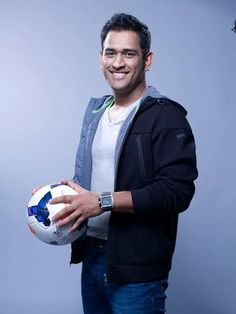

In [78]:
from IPython.display import Image, display

listOfImageNames = ["dhoni images.jpg"]

for imageName in listOfImageNames:
    display(Image(filename=imageName))

In [79]:
def rmse(predictions, targets):
    differences = predictions - targets
    differences_squared = differences**2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt(mean_of_differences_squared)
    return rmse_val


In [80]:
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns=cols)
#predicting the model on test data
predictions1 = model1.predict(x_test)

In [81]:
tmp1 = pd.Series({'Model':'Base Linear Regression Model',
                 'R-Squared Value': model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj,
                 'RMSE': rmse(predictions1, y_test)})

model1_report = models_report.append(tmp1, ignore_index=True)
model1_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.958319,0.943784,0.463055


In [82]:
target_log

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

# 8.3 Building model with constant


In [83]:
df_constant=sm.add_constant(newdata)

In [84]:
x_train1,x_test1,y_train1,y_test1=train_test_split(df_constant,target_log,test_size=0.30,random_state=0)
x_train1,x_test1,y_train1,y_test1

(      const  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
 64      1.0     0.015568  0.006840     0.100076   0.186465      0.218904   
 682     1.0     0.015568 -0.223669    -0.011035   0.179219      0.202237   
 960     1.0    -0.103554 -0.044634    -0.122146  -0.096144      0.385571   
 1384    1.0    -0.036201  0.000150    -0.011035  -0.233825     -0.581096   
 1100    1.0    -0.036201 -0.014654    -0.455479  -0.371506     -0.581096   
 ...     ...          ...       ...          ...        ...           ...   
 763     1.0     0.079648  0.007985     0.211187   0.200958      0.235571   
 835     1.0    -0.036201  0.011482    -0.233257  -0.154115      0.168904   
 1216    1.0     0.010156 -0.002678    -0.011035   0.048784     -0.114429   
 559     1.0     0.015568 -0.203772     0.100076   0.229943      0.318904   
 684     1.0    -0.048741  0.120666     0.100076   0.193712      0.218904   
 
       MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI 

In [85]:
import statsmodels.api as sm
model2=sm.OLS(y_train1,x_train1).fit()

In [86]:
# printing linear regression summary
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS              Adj. R-squared:     0.944     
Dependent Variable:   SalePrice        AIC:                -1680.2974
Date:                 2020-12-03 14:17 BIC:                -373.9755 
No. Observations:     1022             Log-Likelihood:     1105.1    
Df Model:             264              F-statistic:        65.93     
Df Residuals:         757              Prob (F-statistic): 0.00      
R-squared:            0.958            Scale:              0.0090913 
---------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                  9.2895   0.2045 45.4308 0.0000  8.8881  9.6910
LotFrontage            0.0851   0.0514  1.6559 0.0982 -0.0158  0.1860
LotArea                0.5269   0.0792  6.6549 0.0000  0.3715  0.6824
OverallQual            0.3031   0.0501  6.0531 0.0000  0.2048  0.4014
YearBuilt              0.2539   0.0653  3.8882 0.0001  0.1257  0.3820
YearRemodAdd           0.0491   0.0188  2.6128 0.0092  0.0122  0.0860
MasVnrArea             0.0549   0.0473  1.1609 0.2460 -0.0379  0.1478
BsmtFinSF1             0.0975   0.0514  1.8994 0.0579 -0.0033  0.1984
BsmtFinSF2            -0.0001   0.0767 -0.0013 0.9989 -0.1506  0.1504
BsmtUnfSF             -0.0355   0.0258 -1.3782 0.1685 -0.0861  0.0151
LowQualFinSF           0.0102   0.0398  0.2568 0.7974 -0.0679  0.0884
GrLivArea              0.6069   0.1794  3.3825 0.0008  0.2547  0.9591
BsmtFullBath           0.0870   0.0307  2.8315 0.0048  0.0267  0.1473
BsmtHalfBath           0.0446   0.0267  1.6712 0.0951 -0.0078  0.0969
FullBath               0.1088   0.0359  3.0285 0.0025  0.0383  0.1794
HalfBath               0.0598   0.0241  2.4843 0.0132  0.0126  0.1071
BedroomAbvGr          -0.0739   0.0617 -1.1985 0.2311 -0.1949  0.0471
KitchenAbvGr          -0.1743   0.1152 -1.5127 0.1308 -0.4005  0.0519
TotRmsAbvGrd           0.0416   0.0593  0.7007 0.4837 -0.0749  0.1580
Fireplaces             0.0576   0.0363  1.5863 0.1131 -0.0137  0.1289
GarageYrBlt           -0.0139   0.0377 -0.3687 0.7124 -0.0879  0.0601
GarageCars             0.0163   0.0516  0.3163 0.7519 -0.0850  0.1176
GarageArea             0.1902   0.0630  3.0180 0.0026  0.0665  0.3139
WoodDeckSF             0.0395   0.0103  3.8208 0.0001  0.0192  0.0597
OpenPorchSF            0.0078   0.0127  0.6166 0.5377 -0.0171  0.0327
EnclosedPorch          0.0095   0.0153  0.6211 0.5347 -0.0206  0.0396
3SsnPorch             -0.0038   0.0337 -0.1120 0.9109 -0.0699  0.0624
ScreenPorch            0.0385   0.0155  2.4806 0.0133  0.0080  0.0689
PoolArea              -0.0219   0.1643 -0.1331 0.8942 -0.3445  0.3007
MiscVal                0.0422   0.0915  0.4605 0.6453 -0.1376  0.2219
TotalSF                0.9423   0.2148  4.3865 0.0000  0.5206  1.3641
MSSubClass_160        -0.0668   0.0581 -1.1503 0.2504 -0.1808  0.0472
MSSubClass_180         0.0586   0.0788  0.7434 0.4575 -0.0961  0.2133
MSSubClass_190        -0.0261   0.1541 -0.1691 0.8658 -0.3286  0.2764
MSSubClass_20         -0.0470   0.0677 -0.6938 0.4880 -0.1798  0.0859
MSSubClass_30         -0.0968   0.0719 -1.3457 0.1788 -0.2380  0.0444
MSSubClass_40          0.0257   0.1190  0.2162 0.8289 -0.2079  0.2594
MSSubClass_45         -0.5774   0.1738 -3.3219 0.0009 -0.9186 -0.2362
MSSubClass_50         -0.0921   0.0876 -1.0515 0.2934 -0.2641  0.0799
MSSubClass_60         -0.0706   0.0834 -0.8466 0.3975 -0.2343  0.0931
MSSubClass_70         -0.0424   0.0845 -0.5020 0.6158 -0.2084  0.1235
MSSubClass_75         -0.1085   0.1130 -0.9608 0.3369 -0.3303  0.1132
MSSubClass_80         -0.0823   0.1014 -0.8115 0.4173 -0.2815  0.1168
MSSubClass_85         -0.0196   0.0928 -0.2109 0.8330 -0.2017  0.1626
MSSubClass_90         -0.0400   0.0400 -0.9995 0.3

In [87]:
predictions2= model2.predict(x_test1)
tmp2 = pd.Series({'Model':'Base Linear Regression Model',
                 'R-Squared Value': model2.rsquared,
                 'Adj.R-Squared Value': model2.rsquared_adj,
                 'RMSE': rmse(predictions2, y_test1)})

model2_report = models_report.append(tmp2, ignore_index=True)
model2_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.958319,0.943784,0.166903


# VIF: 1= not correlated, 1 <=vif>=5 moderately correlated,>5 highly r=correlated 

# calculating VIF variancce inflation factor

In [88]:
print("\nVariance Inflation Factor")
cnames=x_train1.columns
for i in np.arange(0,len(cnames)):
    xvars=list(cnames)
    yvar=xvars.pop(i)
    mod=sm.OLS(x_train1[yvar],(x_train1[xvars]))
    res=mod.fit()
    vif=1/(1-res.rsquared)
    print(yvar,round(vif,3))


Variance Inflation Factor
const 0.0
LotFrontage 3.914
LotArea 7.103
OverallQual 6.411
YearBuilt 22.992
YearRemodAdd 4.634
MasVnrArea 31.83
BsmtFinSF1 35.571
BsmtFinSF2 43.937
BsmtUnfSF 4.085
LowQualFinSF 2.479
GrLivArea 50.109
BsmtFullBath 3.123
BsmtHalfBath 1.721
FullBath 4.728
HalfBath 4.044
BedroomAbvGr 4.303
KitchenAbvGr 6.224
TotRmsAbvGrd 7.163
Fireplaces 6.648
GarageYrBlt 7.796
GarageCars 10.064
GarageArea 9.67
WoodDeckSF 1.783
OpenPorchSF 2.118
EnclosedPorch 2.074
3SsnPorch 1.451
ScreenPorch 1.459
PoolArea 8.349
MiscVal 18.017
TotalSF 38.964
MSSubClass_160 16.977
MSSubClass_180 2.721
MSSubClass_190 53.722
MSSubClass_20 119.855
MSSubClass_30 25.517
MSSubClass_40 4.661
MSSubClass_45 36.156
MSSubClass_50 75.463
MSSubClass_60 129.837
MSSubClass_70 33.816
MSSubClass_75 13.901
MSSubClass_80 39.317
MSSubClass_85 12.157
MSSubClass_90 inf
MSZoning_FV 17.047
MSZoning_RH 5.883
MSZoning_RL 54.608
MSZoning_RM 35.547
Street_Pave 2.078
Alley_Pave 2.55
LotShape_IR2 1.538
LotShape_IR3 1.541
Lot

In [90]:
vif_100=['MSSubclass_20','MSSubclass_60','RoofStyle_Gable','RoofStyle_Hip','RoofMat1_CompShg','Exterior1st_MetalSd','Exterior1st_VinylSd','Exterior2nd_VinylSd','GarageQual_TA','GarageCond_TA']
#custom function to remove variables having higher VIF
to_keep=[x for x in x_train1 if x not in vif_100]
# print (to_keep)
x_train2=x_train1[to_keep]
x_train2.head()

,const,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
64,1.0,0.015568,0.006840,0.100076,0.186465,0.218904,0.572034,0.275153,-0.089825,0.015060,...,0,0,0,0,1,0,0,0,1,0
682,1.0,0.015568,-0.223669,-0.011035,0.179219,0.202237,-0.288945,0.310472,-0.089825,0.002327,...,0,0,0,0,1,0,0,0,1,0
960,1.0,-0.103554,-0.044634,-0.122146,-0.096144,0.385571,-0.288945,0.268223,-0.089825,-0.071504,...,0,0,0,0,1,0,0,0,1,0
1384,1.0,-0.036201,0.000150,-0.011035,-0.233825,-0.581096,-0.288945,0.126559,-0.089825,0.029569,...,0,0,0,0,1,0,0,0,1,0
1100,1.0,-0.036201,-0.014654,-0.455479,-0.371506,-0.581096,-0.288945,0.167111,-0.089825,-0.728201,...,0,0,0,0,1,0,0,0,1,0


# 8.4.1 Building a model after removing VIF greater than 100

In [91]:
import statsmodels.api as sm
#building model using OLS
model3=sm.OLS(y_train1,x_train2).fit()
model3.summary()# printing linear regression summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     66.88
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:18:20   Log-Likelihood:                 1094.5
No. Observations:                1022   AIC:                            -1673.
Df Residuals:                     764   BIC:                            -401.2
Df Model:                         257                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.3021      0.196     47.424      0.000       8.917       9.687
LotFrontage               0.1026      0.051      1.997      0.046       0.002       0.203
LotArea                   0.5163      0.079      6.507      0.000       0.361       0.672
OverallQual               0.3159      0.050      6.349      0.000       0.218       0.414
YearBuilt                 0.2429      0.065      3.725      0.000       0.115       0.371
YearRemodAdd              0.0490      0.019      2.639      0.008       0.013       0.085
MasVnrArea                0.0648      0.047      1.372      0.170      -0.028       0.157
BsmtFinSF1                0.1083      0.051      2.112      0.035       0.008       0.209
BsmtFinSF2               -0.0083      0.076     -0.108      0.914      -0.158       0.142
BsmtUnfSF                -0.0391      0.026     -1.509      0.132      -0.090       0.012
LowQualFinSF              0.0276      0.040      0.696      0.487      -0.050       0.106
GrLivArea                 0.6077      0.179      3.390      0.001       0.256       0.960
BsmtFullBath              0.0866      0.031      2.826      0.005       0.026       0.147
BsmtHalfBath              0.0412      0.027      1.545      0.123      -0.011       0.094
FullBath                  0.1027      0.036      2.851      0.004       0.032       0.173
HalfBath                  0.0576      0.024      2.420      0.016       0.011       0.104
BedroomAbvGr             -0.0793      0.062     -1.287      0.198      -0.200       0.042
KitchenAbvGr             -0.1801      0.115     -1.573      0.116      -0.405       0.045
TotRmsAbvGrd              0.0670      0.059      1.132      0.258      -0.049       0.183
Fireplaces                0.0501      0.036      1.382      0.167      -0.021       0.121
GarageYrBlt               0.0070      0.037      0.190      0.849      -0.065       0.079
GarageCars                0.0112      0.051      0.217      0.828      -0.090       0.112
GarageArea                0.1472      0.062      2.392      0.017       0.026       0.268
WoodDeckSF                0.0363      0.010      3.513      0.000       0.016       0.057
OpenPorchSF               0.0085      0.013      0.671      0.503      -0.016       0.033
EnclosedPorch             0.0095      0.015      0.622      0.534      -0.020       0.039
3SsnPorch                -0.0101      0.034     -0.298      0.766      -0.076       0.056
ScreenPorch               0.0450      0.015      2.925      0.004       0.015       0.075
PoolArea                 -0.0989      0.162     -0.611      0.542      -0.417       0.219
MiscVal                   0.0464      0.092      0.507      0.612      -0.133       0.226
TotalSF                   0.9499      0.215      4.408      0.000       0.527       1.373
MSSubClass_160         

In [92]:
vif_100=['MSSubclass_20','MSSubclass_60','RoofStyle_Gable','RoofStyle_Hip','RoofMat1_CompShg','Exterior1st_MetalSd','Exterior1st_VinylSd','Exterior2nd_VinylSd','GarageQual_TA','GarageCond_TA']
#custom function to remove variables having higher VIF
to_keep=[x for x in x_test1 if x not in vif_100]
# print (to_keep)
x_test2=x_test1[to_keep]
x_test2.head()

,const,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
529,1.0,0.015568,0.251185,-0.011035,-0.103390,-0.164429,0.015568,0.333029,-0.089825,0.136304,...,0,0,0,0,1,0,1,0,0,0
491,1.0,0.065799,0.009226,-0.011035,-0.219332,-0.581096,-0.288945,0.205091,0.610792,-0.022164,...,0,0,0,0,1,0,0,0,1,0
459,1.0,0.015568,-0.049919,-0.122146,-0.154115,-0.581096,0.400582,0.115299,-0.089825,0.079290,...,0,0,0,0,1,0,0,0,1,0
279,1.0,0.084153,0.019570,0.100076,0.041538,-0.131096,0.484095,0.201895,-0.089825,0.128498,...,0,0,0,0,1,0,0,0,1,0
655,1.0,-0.419834,-0.329602,-0.011035,-0.001941,-0.231096,0.516844,-0.489636,-0.089825,0.079535,...,0,0,0,0,1,0,0,1,0,0


In [93]:
predictions3= model3.predict(x_test2)
tmp3 = pd.Series({'Model':'LRM after removing VIF above 100',
                 'R-Squared Value': model3.rsquared,
                 'Adj.R-Squared Value': model3.rsquared_adj,
                 'RMSE': rmse(predictions3, y_test1)})

model3_report = models_report.append(tmp3, ignore_index=True)
model3_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 100,0.957442,0.943126,0.165917


# checking Variable having VIF above 10

In [94]:
# removing variable has threshold value of VIF above 10
print("\nVariance Inflation Factor")
cnames=x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars=list(cnames)
    yvar=xvars.pop(i)
    mod=sm.OLS(x_train2[yvar],(x_train2[xvars]))
    res=mod.fit()
    vif=1/(1-res.rsquared)
    print(yvar,round(vif,3))


Variance Inflation Factor
const 0.0
LotFrontage 3.864
LotArea 7.052
OverallQual 6.256
YearBuilt 22.672
YearRemodAdd 4.472
MasVnrArea 31.349
BsmtFinSF1 35.073
BsmtFinSF2 43.032
BsmtUnfSF 4.071
LowQualFinSF 2.436
GrLivArea 49.459
BsmtFullBath 3.075
BsmtHalfBath 1.701
FullBath 4.694
HalfBath 3.904
BedroomAbvGr 4.25
KitchenAbvGr 6.077
TotRmsAbvGrd 7.055
Fireplaces 6.553
GarageYrBlt 7.288
GarageCars 9.843
GarageArea 9.119
WoodDeckSF 1.762
OpenPorchSF 2.083
EnclosedPorch 2.034
3SsnPorch 1.438
ScreenPorch 1.419
PoolArea 8.019
MiscVal 17.848
TotalSF 38.747
MSSubClass_160 16.494
MSSubClass_180 2.69
MSSubClass_190 52.569
MSSubClass_20 118.818
MSSubClass_30 25.28
MSSubClass_40 4.638
MSSubClass_45 35.756
MSSubClass_50 74.753
MSSubClass_60 127.982
MSSubClass_70 33.48
MSSubClass_75 13.443
MSSubClass_80 39.28
MSSubClass_85 12.065
MSSubClass_90 inf
MSZoning_FV 16.928
MSZoning_RH 5.778
MSZoning_RL 54.19
MSZoning_RM 35.215
Street_Pave 2.026
Alley_Pave 2.531
LotShape_IR2 1.484
LotShape_IR3 1.535
LotShap

# Below are the variable having above 10 VIF threshold

In [95]:

vif_10 = ['MSSubClass_20','MSSubClass_60','MSSubClass_90','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','GrLivArea', 
          'GarageYrBlt','MiscVal','TotalSF','MSSubClass_190','MSSubClass_45','Neighborhood_Gilbert','Neighborhood_IDOTRR',
          'MSSubClass_50','MSSubClass_80', 'MSZoning_FV','MSZoning_RL','MSZoning_RM','Neighborhood_BrkSide',
          'Neighborhood_CollgCr','Neighborhood_Edwards', 'Neighborhood_NAmes','Neighborhood_OldTown','Neighborhood_Sawyer',
          'Neighborhood_Somerst','Condition2_Norm','HouseStyle_1.5Unf','HouseStyle_2Story','HouseStyle_SLvl',
          'Neighborhood_NWAmes', 'Condition2_Feedr','BldgType_2fmCon','Foundation_PConc','KitchenQual_TA',
          'HouseStyle_SFoyer','MasVnrType_BrkFace','HouseStyle_1Story','Exterior1st_CemntBd','Exterior1st_HdBoard',
          'Exterior1st_Plywood','Exterior1st_Wd Sdng','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_Plywood',
          'Exterior2nd_Wd Sdng','MasVnrType_None','MasVnrType_Stone', 'ExterQual_Gd','ExterQual_TA','ExterCond_Fa',
          'ExterCond_Gd','ExterCond_TA','BsmtQual_TA','BsmtFinType1_Unf','BsmtFinType2_Unf','Heating_GasA',
          'Heating_GasW','Heating_Grav','GarageType_BuiltIn','SaleType_New','SaleCondition_Partial','GarageType_Attchd',
          'GarageType_Detchd','MiscFeature_Shed','Functional_Typ']
to_keep=[x for x in x_train2 if x not in vif_10]
# print (to_keep)
x_train2=x_train2[to_keep]
x_train2.head()

,const,LotFrontage,LotArea,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
64,1.0,0.015568,0.006840,0.100076,0.218904,0.015060,-0.015717,0.191553,-0.035941,0.144977,...,0,0,0,0,0,1,0,0,0,1
682,1.0,0.015568,-0.223669,-0.011035,0.202237,0.002327,-0.015717,0.191553,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
960,1.0,-0.103554,-0.044634,-0.122146,0.385571,-0.071504,-0.015717,0.191553,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
1384,1.0,-0.036201,0.000150,-0.011035,-0.581096,0.029569,-0.015717,-0.141781,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
1100,1.0,-0.036201,-0.014654,-0.455479,-0.581096,-0.728201,-0.015717,-0.141781,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1


In [96]:
# Building model after removing VIF above 10
import statsmodels.api as sm
#building model using OLS
model4=sm.OLS(y_train1,x_train2).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     50.91
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:19:15   Log-Likelihood:                 780.74
No. Observations:                1022   AIC:                            -1177.
Df Residuals:                     830   BIC:                            -231.0
Df Model:                         191                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.1154      0.092     99.371      0.000       8.935       9.295
LotFrontage               0.1740      0.063      2.762      0.006       0.050       0.298
LotArea                   0.4516      0.087      5.218      0.000       0.282       0.621
OverallQual               0.7148      0.054     13.174      0.000       0.608       0.821
YearRemodAdd              0.0930      0.022      4.322      0.000       0.051       0.135
BsmtUnfSF                 0.0195      0.028      0.701      0.483      -0.035       0.074
LowQualFinSF             -0.0586      0.046     -1.262      0.207      -0.150       0.033
BsmtFullBath              0.1869      0.034      5.572      0.000       0.121       0.253
BsmtHalfBath              0.0696      0.033      2.135      0.033       0.006       0.134
FullBath                  0.2570      0.040      6.488      0.000       0.179       0.335
HalfBath                  0.0816      0.022      3.754      0.000       0.039       0.124
BedroomAbvGr              0.0238      0.074      0.322      0.747      -0.121       0.169
KitchenAbvGr             -0.2209      0.112     -1.976      0.048      -0.440      -0.001
TotRmsAbvGrd              0.3718      0.063      5.932      0.000       0.249       0.495
Fireplaces                0.1585      0.045      3.543      0.000       0.071       0.246
GarageCars                0.0806      0.060      1.349      0.178      -0.037       0.198
GarageArea                0.3111      0.073      4.276      0.000       0.168       0.454
WoodDeckSF                0.0453      0.013      3.494      0.001       0.020       0.071
OpenPorchSF               0.0338      0.015      2.233      0.026       0.004       0.064
EnclosedPorch            -0.0358      0.018     -1.967      0.050      -0.071   -7.11e-05
3SsnPorch                 0.0099      0.043      0.234      0.815      -0.074       0.093
ScreenPorch               0.0565      0.019      2.912      0.004       0.018       0.095
PoolArea                 -0.0787      0.193     -0.408      0.683      -0.457       0.300
MSSubClass_160           -0.0342      0.039     -0.882      0.378      -0.110       0.042
MSSubClass_180           -0.0491      0.078     -0.631      0.529      -0.202       0.104
MSSubClass_30            -0.1058      0.025     -4.155      0.000      -0.156      -0.056
MSSubClass_40             0.1313      0.115      1.139      0.255      -0.095       0.357
MSSubClass_70            -0.0091      0.027     -0.335      0.738      -0.062       0.044
MSSubClass_75             0.0860      0.092      0.930      0.353      -0.096       0.267
MSSubClass_85            -0.0169      0.041     -0.415      0.678      -0.097       0.063
MSZoning_RH               0.0231      0.040      0.574      0.566      -0.056       0.102
Street_Pave            

In [97]:
vif_10 = ['MSSubClass_20','MSSubClass_60','MSSubClass_90','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','GrLivArea', 
          'GarageYrBlt','MiscVal','TotalSF','MSSubClass_190','MSSubClass_45','Neighborhood_Gilbert','Neighborhood_IDOTRR',
          'MSSubClass_50','MSSubClass_80', 'MSZoning_FV','MSZoning_RL','MSZoning_RM','Neighborhood_BrkSide',
          'Neighborhood_CollgCr','Neighborhood_Edwards', 'Neighborhood_NAmes','Neighborhood_OldTown','Neighborhood_Sawyer',
          'Neighborhood_Somerst','Condition2_Norm','HouseStyle_1.5Unf','HouseStyle_2Story','HouseStyle_SLvl',
          'Neighborhood_NWAmes', 'Condition2_Feedr','BldgType_2fmCon','Foundation_PConc','KitchenQual_TA',
          'HouseStyle_SFoyer','MasVnrType_BrkFace','HouseStyle_1Story','Exterior1st_CemntBd','Exterior1st_HdBoard',
          'Exterior1st_Plywood','Exterior1st_Wd Sdng','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_Plywood',
          'Exterior2nd_Wd Sdng','MasVnrType_None','MasVnrType_Stone', 'ExterQual_Gd','ExterQual_TA','ExterCond_Fa',
          'ExterCond_Gd','ExterCond_TA','BsmtQual_TA','BsmtFinType1_Unf','BsmtFinType2_Unf','Heating_GasA',
          'Heating_GasW','Heating_Grav','GarageType_BuiltIn','SaleType_New','SaleCondition_Partial','GarageType_Attchd',
          'GarageType_Detchd','MiscFeature_Shed','Functional_Typ']
to_keep=[x for x in x_test2 if x not in vif_10]
# print (to_keep)
x_test2=x_test2[to_keep]
x_test2.head()

,const,LotFrontage,LotArea,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
529,1.0,0.015568,0.251185,-0.011035,-0.164429,0.136304,-0.015717,0.191553,-0.035941,0.478311,...,0,0,0,0,0,1,0,1,0,0
491,1.0,0.065799,0.009226,-0.011035,-0.581096,-0.022164,-0.015717,0.191553,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
459,1.0,0.015568,-0.049919,-0.122146,-0.581096,0.079290,-0.015717,0.191553,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
279,1.0,0.084153,0.019570,0.100076,-0.131096,0.128498,-0.015717,-0.141781,-0.035941,0.144977,...,0,0,0,0,0,1,0,0,0,1
655,1.0,-0.419834,-0.329602,-0.011035,-0.231096,0.079535,-0.015717,-0.141781,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,1,0


In [98]:
predictions4= model4.predict(x_test2)
tmp4 = pd.Series({'Model':'LRM after removing VIF above 10',
                 'R-Squared Value': model4.rsquared,
                 'Adj.R-Squared Value': model4.rsquared_adj,
                 'RMSE': rmse(predictions4, y_test1)})

model4_report = models_report.append(tmp4, ignore_index=True)
model4_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 10,0.92136,0.903263,0.172019


# Checking variable having VIF above 5

In [99]:
# removing variable has threshold value of VIF above 5
print("\nVariance Inflation Factor")
cnames=x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars=list(cnames)
    yvar=xvars.pop(i)
    mod=sm.OLS(x_train2[yvar],(x_train2[xvars]))
    res=mod.fit()
    vif=1/(1-res.rsquared)
    print(yvar,round(vif,3))


Variance Inflation Factor
const 0.0
LotFrontage 3.42
LotArea 4.931
OverallQual 4.373
YearRemodAdd 3.531
BsmtUnfSF 2.754
LowQualFinSF 1.962
BsmtFullBath 2.164
BsmtHalfBath 1.495
FullBath 3.338
HalfBath 1.913
BedroomAbvGr 3.581
KitchenAbvGr 3.404
TotRmsAbvGrd 4.648
Fireplaces 5.868
GarageCars 7.846
GarageArea 7.492
WoodDeckSF 1.635
OpenPorchSF 1.759
EnclosedPorch 1.696
3SsnPorch 1.341
ScreenPorch 1.324
PoolArea 6.677
MSSubClass_160 4.396
MSSubClass_180 1.543
MSSubClass_30 1.858
MSSubClass_40 2.538
MSSubClass_70 2.016
MSSubClass_75 5.411
MSSubClass_85 1.355
MSZoning_RH 1.428
Street_Pave 1.498
Alley_Pave 1.795
LotShape_IR2 1.395
LotShape_IR3 1.39
LotShape_Reg 1.6
LandContour_HLS 2.345
LandContour_Low 2.95
LandContour_Lvl 3.82
Utilities_NoSeWa 1.391
LotConfig_CulDSac 1.911
LotConfig_FR2 1.34
LotConfig_FR3 1.651
LotConfig_Inside 1.847
LandSlope_Mod 1.986
LandSlope_Sev 2.611
Neighborhood_Blueste 1.339
Neighborhood_BrDale 1.966
Neighborhood_ClearCr 1.663
Neighborhood_Crawfor 1.764
Neighborhoo

In [100]:
vif_5=['LotArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','PoolArea','MSSubClass_75','RoofStyle_Shed',
       'BsmtCond_TA','FireplaceQu_TA','PoolQC_Gd','Condition1_Norm','MoSold_6','MoSold_7']
to_keep=[x for x in x_train2 if x not in vif_5]
# print (to_keep)
x_train2=x_train2[to_keep]
x_train2

,const,LotFrontage,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
64,1.0,0.015568,0.100076,0.218904,0.015060,-0.015717,0.191553,-0.035941,0.144977,0.308562,...,0,0,0,0,0,1,0,0,0,1
682,1.0,0.015568,-0.011035,0.202237,0.002327,-0.015717,0.191553,-0.035941,-0.188356,-0.191438,...,0,0,0,0,0,1,0,0,0,1
960,1.0,-0.103554,-0.122146,0.385571,-0.071504,-0.015717,0.191553,-0.035941,-0.188356,-0.191438,...,0,0,0,0,0,1,0,0,0,1
1384,1.0,-0.036201,-0.011035,-0.581096,0.029569,-0.015717,-0.141781,-0.035941,-0.188356,-0.191438,...,0,0,0,0,0,1,0,0,0,1
1100,1.0,-0.036201,-0.455479,-0.581096,-0.728201,-0.015717,-0.141781,-0.035941,-0.188356,-0.191438,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.0,0.079648,0.211187,0.235571,-0.148076,-0.015717,0.191553,-0.035941,0.144977,0.308562,...,0,0,0,0,0,1,0,0,0,1
835,1.0,-0.036201,-0.233257,0.168904,0.101974,-0.015717,-0.141781,-0.035941,0.144977,-0.191438,...,0,0,0,0,0,1,0,0,0,1
1216,1.0,0.010156,-0.011035,-0.114429,-0.728201,-0.015717,-0.141781,-0.035941,0.144977,-0.191438,...,0,0,0,0,0,1,0,0,0,1
559,1.0,0.015568,0.100076,0.318904,0.203417,-0.015717,-0.141781,-0.035941,0.144977,-0.191438,...,0,0,0,0,0,1,0,0,0,1


# building model after removing vif above 5

In [101]:
# Building model after removing VIF above 10
import statsmodels.api as sm
#building model using OLS
model5=sm.OLS(y_train1,x_train2).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     41.90
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          9.88e-323
Time:                        14:19:35   Log-Likelihood:                 647.00
No. Observations:                1022   AIC:                            -938.0
Df Residuals:                     844   BIC:                            -60.55
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.2765      0.096     96.724      0.000       9.088       9.465
LotFrontage               0.3846      0.066      5.791      0.000       0.254       0.515
OverallQual               0.9374      0.057     16.330      0.000       0.825       1.050
YearRemodAdd              0.0894      0.024      3.752      0.000       0.043       0.136
BsmtUnfSF                 0.0538      0.031      1.742      0.082      -0.007       0.114
LowQualFinSF             -0.0679      0.049     -1.379      0.168      -0.165       0.029
BsmtFullBath              0.2592      0.037      6.963      0.000       0.186       0.332
BsmtHalfBath              0.0580      0.036      1.620      0.106      -0.012       0.128
FullBath                  0.4170      0.042      9.997      0.000       0.335       0.499
HalfBath                  0.1452      0.023      6.246      0.000       0.100       0.191
BedroomAbvGr              0.2013      0.069      2.907      0.004       0.065       0.337
KitchenAbvGr             -0.0434      0.119     -0.366      0.715      -0.276       0.189
WoodDeckSF                0.0652      0.015      4.492      0.000       0.037       0.094
OpenPorchSF               0.0564      0.017      3.323      0.001       0.023       0.090
EnclosedPorch            -0.0424      0.020     -2.079      0.038      -0.082      -0.002
3SsnPorch                -0.0043      0.048     -0.091      0.927      -0.098       0.089
ScreenPorch               0.0758      0.022      3.513      0.000       0.033       0.118
MSSubClass_160           -0.0784      0.043     -1.834      0.067      -0.162       0.005
MSSubClass_180           -0.0985      0.087     -1.131      0.258      -0.269       0.072
MSSubClass_30            -0.1023      0.029     -3.577      0.000      -0.158      -0.046
MSSubClass_40             0.1527      0.106      1.437      0.151      -0.056       0.361
MSSubClass_70             0.0148      0.030      0.493      0.622      -0.044       0.074
MSSubClass_85             0.0198      0.045      0.435      0.663      -0.069       0.109
MSZoning_RH               0.0075      0.045      0.167      0.868      -0.081       0.096
Street_Pave               0.1578      0.075      2.093      0.037       0.010       0.306
Alley_Pave                0.0964      0.034      2.870      0.004       0.030       0.162
LotShape_IR2              0.0528      0.031      1.722      0.086      -0.007       0.113
LotShape_IR3              0.0921      0.067      1.369      0.171      -0.040       0.224
LotShape_Reg             -0.0044      0.011     -0.386      0.700      -0.027       0.018
LandContour_HLS          -0.0435      0.041     -1.057      0.291      -0.124       0.037
LandContour_Low          -0.0252      0.047     -0.540      0.589      -0.117       0.066
LandContour_Lvl        

In [102]:
vif_5=['LotArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','PoolArea','MSSubClass_75','RoofStyle_Shed',
       'BsmtCond_TA','FireplaceQu_TA','PoolQC_Gd','Condition1_Norm','MoSold_6','MoSold_7']
to_keep=[x for x in x_test2 if x not in vif_5]
# print (to_keep)
x_test2=x_test2[to_keep]
x_test2.head()

,const,LotFrontage,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
529,1.0,0.015568,-0.011035,-0.164429,0.136304,-0.015717,0.191553,-0.035941,0.478311,-0.191438,...,0,0,0,0,0,1,0,1,0,0
491,1.0,0.065799,-0.011035,-0.581096,-0.022164,-0.015717,0.191553,-0.035941,-0.188356,-0.191438,...,0,0,0,0,0,1,0,0,0,1
459,1.0,0.015568,-0.122146,-0.581096,0.079290,-0.015717,0.191553,-0.035941,-0.188356,-0.191438,...,0,0,0,0,0,1,0,0,0,1
279,1.0,0.084153,0.100076,-0.131096,0.128498,-0.015717,-0.141781,-0.035941,0.144977,0.308562,...,0,0,0,0,0,1,0,0,0,1
655,1.0,-0.419834,-0.011035,-0.231096,0.079535,-0.015717,-0.141781,-0.035941,-0.188356,0.308562,...,0,0,0,0,0,1,0,0,1,0


In [103]:
predictions5= model5.predict(x_test2)
tmp5 = pd.Series({'Model':'LRM after removing VIF above 5',
                 'R-Squared Value': model5.rsquared,
                 'Adj.R-Squared Value': model5.rsquared_adj,
                 'RMSE': rmse(predictions5, y_test1)})

model5_report = models_report.append(tmp5, ignore_index=True)
model5_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 5,0.897833,0.876407,0.188452


In [104]:
from pymatch.Matcher import Matcher


# 8.5 Removing variable based on Insignificant Variables using p-value

In [105]:
X=x_train2
Y=y_train1
def feature_selection(X,Y,initial_list=[],threshold_in=0.05,threshold_out=0.05,verbose=True):
    """Perform a forward-backward feature selection based on p value from statsmodel.api.OLS
    Arguments:
    X-pandas.dataframe wit candidate features
    Y-list-like with the target
    initial_list- list of featureees to start with column names of X
    threshold_in- include a feature if its p<thrshold_in
    threshold_out-exclude a feature if its p>thrshold_in
    verbose-whether to print the sequence of inclusions and exclusions
    returns:list of selected features
    always set threshold_in<threshold_out to avoid infinite looping
    see https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    

    included=list(initial_list)
    while True:
        changed=False
        # forward step
        excluded=list(set(X.columns)-set(included))
        new_pval=pd.Series(index=excluded) 
        for new_column in excluded:
            model=sm.OLS(Y,sm.add_constant((X[included]+[new_column]))).fit()
            new_pval[new_column]=model.pvalues[new_column]
        best_pval=new_pval.min()
        if best_pval<threshold_in:
            best_feature=new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add {:30} with p-value{:.6}'.format(best_feature,best_pval))
        #backward_step
        model=sm.OLS(Y,sm.add_constant(pd.DataFrame(X[included],index=False))).fit()
        #use all coefs except intercept
        pvalues=model.pvalues.iloc[1:]
        worst_pval=pvalues.max()# null if pvalues is empty
        if worst_pval>threshold_out:
            changed=True
            worst_feature=pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature,worst_pval))
        if not changed:
            break
    return included

result=feature_selection(X,Y).reshape(-1,1)
print(result)
    

ValueError: Unable to coerce to Series, length must be 0: given 1

In [106]:
X=x_train2
Y=y_train1
def feature_selection(X,Y,initial_list=[],threshold_in=0.05,threshold_out=0.05,verbose=True):
    """Perform a forward-backward feature selection based on p value from statsmodel.api.OLS
    Arguments:
    X-pandas.dataframe wit candidate features
    Y-list-like with the target
    initial_list- list of featureees to start with column names of X
    threshold_in- include a feature if its p<thrshold_in
    threshold_out-exclude a feature if its p>thrshold_in
    verbose-whether to print the sequence of inclusions and exclusions
    returns:list of selected features
    always set threshold_in<threshold_out to avoid infinite looping
    see https://en.wikipedia.org/wiki/Stepwise_regression for the details
    
    '''df.to_csv('Step1.csv',index=False)
    df = pd.read_csv('Step1.csv')'''
    """
    

    included=list(initial_list)
    while True:
        changed=False
        # forward step
        excluded=list(set(X.columns)-set(included))
        new_pval=pd.Series(index=excluded) 
        for new_column in excluded:
            model=sm.OLS(Y,sm.add_constant((X[included+[new_column]]))).fit()
            new_pval[new_column]=model.pvalues[new_column]
        best_pval=new_pval.min()
        if best_pval<threshold_in:
            best_feature=new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add {:30} with p-value{:.6}'.format(best_feature,best_pval))
        #backward_step
        ee=X[included].to_csv('model.csv',index=False)
        df=pd.read_csv('model.csv')
        model=sm.OLS(Y,sm.add_constant(df)).fit()
        #use all coefs except intercept
        pvalues=model.pvalues.iloc[1:]
        worst_pval=pvalues.max()# null if pvalues is empty
        if worst_pval>threshold_out:
            changed=True
            worst_feature=pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature,worst_pval))
        if not changed:
            break
    return included

result=feature_selection(X,Y)
print(result)
    

Add                            101 with p-value0.0


KeyError: "None of [Int64Index([101], dtype='int64')] are in the [columns]"

In [ ]:
df_train= x_train2.filter(['const', 'OverallQual', 'LotFrontage', 'FullBath', 'BsmtFullBath', 'CentralAir_Y', 'HalfBath', 'Condition2_PosN', 'Neighborhood_Crawfor', 'LotConfig_CulDSac', 'WoodDeckSF', 'YearRemodAdd', 'Neighborhood_ClearCr', 'Exterior1st_BrkFace', 'ScreenPorch', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'OverallCond_3', 'MSSubClass_30', 'SaleType_WD', 'OverallCond_5', 'BsmtExposure_Gd', 'Neighborhood_StoneBr', 'Functional_Maj2', 'Exterior2nd_Wd Shng', 'FireplaceQu_Gd', 'Exterior1st_BrkComm', 'MSSubClass_160', 'Alley_Pave', 'OpenPorchSF', 'PavedDrive_Y', 'BedroomAbvGr', 'OverallCond_4', 'Heating_OthW', 'Neighborhood_Timber', 'SaleCondition_Normal', 'SaleType_ConLI', 'YrSold_2010', 'BsmtUnfSF', 'LotShape_IR2', 'GarageQual_Fa', 'Utilities_NoSeWa', 'BsmtHalfBath', 'OverallCond_8', 'SaleType_ConLw', 'Fence_MnPrv', 'Fence_GdWo', 'RoofMatl_WdShngl', 'HeatingQC_TA', 'Exterior2nd_Brk Cmn', 'RoofStyle_Gambrel'])
df_test= x_test2.filter(['const', 'OverallQual', 'LotFrontage', 'FullBath', 'BsmtFullBath', 'CentralAir_Y', 'HalfBath', 'Condition2_PosN', 'Neighborhood_Crawfor', 'LotConfig_CulDSac', 'WoodDeckSF', 'YearRemodAdd', 'Neighborhood_ClearCr', 'Exterior1st_BrkFace', 'ScreenPorch', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'OverallCond_3', 'MSSubClass_30', 'SaleType_WD', 'OverallCond_5', 'BsmtExposure_Gd', 'Neighborhood_StoneBr', 'Functional_Maj2', 'Exterior2nd_Wd Shng', 'FireplaceQu_Gd', 'Exterior1st_BrkComm', 'MSSubClass_160', 'Alley_Pave', 'OpenPorchSF', 'PavedDrive_Y', 'BedroomAbvGr', 'OverallCond_4', 'Heating_OthW', 'Neighborhood_Timber', 'SaleCondition_Normal', 'SaleType_ConLI', 'YrSold_2010', 'BsmtUnfSF', 'LotShape_IR2', 'GarageQual_Fa', 'Utilities_NoSeWa', 'BsmtHalfBath', 'OverallCond_8', 'SaleType_ConLw', 'Fence_MnPrv', 'Fence_GdWo', 'RoofMatl_WdShngl', 'HeatingQC_TA', 'Exterior2nd_Brk Cmn', 'RoofStyle_Gambrel'])
df_train.isna().sum().sum(), df_test.isna().sum().sum()

In [ ]:
# Building model after removing VIF above 10
import statsmodels.api as sm

model6=sm.OLS(y_train1,df_train).fit()
model6.summary()

In [ ]:
predictions6= model6.predict(df_test)
tmp6 = pd.Series({'Model':'LRM after removing Insignificant Variables',
                 'R-Squared Value': model6.rsquared,
                 'Adj.R-Squared Value': model6.rsquared_adj,
                 'RMSE': rmse(predictions6, y_test1)})

model6_report = models_report.append(tmp6, ignore_index=True)
model6_report

# Multiplicative Interactions
 "*" will also include the individuals columns that were multiplied together

In [ ]:
target=pd.DataFrame(y_train1,columns=['SalePrice'])
data=pd.concat([x_train2,target],axis=1)

import statsmodels.formula.api as smf
interaction=smf.ols(formula='SalePrice ~ OverallQual * YearRemodAdd * BsmtFullBath',data=data).fit()
interaction.summary()